In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("2017 high throughoutDFT calculations of formation energy stability and oxygen vacancy formation energy of ABO3 prerovskites.csv")
df= pd.DataFrame(data)

In [3]:
df_temp1= [df['B'] == 'Fe']
df_temp2= [df['B'] == 'Co']

In [4]:
df_temp = df[df['B'].isin(['Fe','Co'])]

In [5]:
df_temp = df_temp.drop(['Chemical formula','Valence A','Valence B','alpha [deg]','beta [deg]','gamma [deg]','In literature'], axis = 1)

In [6]:
df_temp.keys()

Index(['A', 'B', 'Radius A [ang]', 'Radius B [ang]', 'Lowest distortion',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Magnetic moment [mu_B]', 'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'a [ang]', 'b [ang]', 'c [ang]', 'Vacancy energy [eV/O atom]'],
      dtype='object')

In [7]:
df_temp

,A,B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],Stability [eV/atom],Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],Vacancy energy [eV/O atom]
12,Ac,Co,1.12,0.63,rhombohedral,-2.426,-0.01,0.592,11.94,0,5.522,5.522,5.522,3.33
19,Ac,Fe,1.12,0.67,orthorhombic,-2.731,-0.116,1,12.687,0.906,5.63,5.655,7.97,4.135
85,Ag,Co,1.28,0.63,orthorhombic,-0.481,0.258,0.005,10.146,0,5.208,5.302,7.348,-
92,Ag,Fe,1.28,0.67,orthorhombic,-0.817,0.142,0.851,10.78,0,5.451,5.474,7.225,-
158,Al,Co,0.54,0.61,cubic,-0.957,1.302,0.005,9.363,0,3.604,3.604,3.604,-1.991
165,Al,Fe,0.54,0.65,cubic,-1.125,1.332,0.853,10.496,0,3.744,3.744,3.744,-2.445
231,As,Co,0.58,0.61,cubic,-0.584,0.82,-0.004,9.799,0,3.659,3.659,3.659,0.089
238,As,Fe,0.58,0.65,cubic,-0.747,0.805,0.911,10.955,0,3.798,3.798,3.798,-0.724
304,Au,Co,0.93,0.63,cubic,-0.071,0.697,-0.009,10.6,0,3.756,3.756,3.756,-2.143
311,Au,Fe,0.93,0.67,cubic,-0.396,0.569,0.6,11.049,0,3.809,3.809,3.809,-1.534


In [8]:
from sklearn.preprocessing import LabelEncoder
lt = LabelEncoder()
df_temp['Lowest distortion'] = lt.fit_transform(df_temp['Lowest distortion'])
df_temp['A'] = lt.fit_transform(df_temp['A'])
df_temp['B'] = lt.fit_transform(df_temp['B'])

In [9]:
df_temp.keys()

Index(['A', 'B', 'Radius A [ang]', 'Radius B [ang]', 'Lowest distortion',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Magnetic moment [mu_B]', 'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'a [ang]', 'b [ang]', 'c [ang]', 'Vacancy energy [eV/O atom]'],
      dtype='object')

In [10]:
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor

In [11]:
wirdString = df_temp['Vacancy energy [eV/O atom]'][85]
df_temp['Vacancy energy [eV/O atom]'].replace(wirdString, np.nan, inplace=True)

In [12]:
df_temp=df_temp.dropna(axis=0,how='any') 

In [13]:
X=np.array(df_temp[['A', 'B', 'Radius A [ang]', 'Radius B [ang]', 'Lowest distortion',
        'Stability [eV/atom]',
       'Magnetic moment [mu_B]', 'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'a [ang]', 'b [ang]', 'c [ang]']])

In [14]:
y=np.array(df_temp[ 'Formation energy [eV/atom]'])
#'Vacancy energy [eV/O atom]'

In [15]:

 # Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)

In [16]:
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 10 (0.203408)
2. feature 5 (0.195645)
3. feature 9 (0.134146)
4. feature 11 (0.131698)
5. feature 2 (0.115280)
6. feature 8 (0.076593)
7. feature 3 (0.039145)
8. feature 0 (0.038052)
9. feature 6 (0.022072)
10. feature 7 (0.015978)
11. feature 4 (0.015185)
12. feature 1 (0.012797)


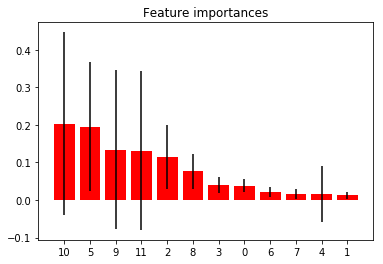

In [17]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [25]:
df_temp.head()

,A,B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],Stability [eV/atom],Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],Vacancy energy [eV/O atom]
12,0,0,1.12,0.63,3,-2.426,-0.01,0.592,11.94,0,5.522,5.522,5.522,3.33
19,0,1,1.12,0.67,2,-2.731,-0.116,1,12.687,0.906,5.63,5.655,7.97,4.135
158,2,0,0.54,0.61,1,-0.957,1.302,0.005,9.363,0,3.604,3.604,3.604,-1.991
165,2,1,0.54,0.65,1,-1.125,1.332,0.853,10.496,0,3.744,3.744,3.744,-2.445
231,3,0,0.58,0.61,1,-0.584,0.82,-0.004,9.799,0,3.659,3.659,3.659,0.089


In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [19]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

e:\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
e:\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
e:\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

Num Features: 3
Selected Features: [False  True False False False False False  True False False False  True]
Feature Ranking: [ 9  1  8 10  4  2  3  1  5  7  6  1]


e:\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
e:\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [20]:
df_temp.head()

,A,B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],Stability [eV/atom],Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],Vacancy energy [eV/O atom]
12,0,0,1.12,0.63,3,-2.426,-0.01,0.592,11.94,0,5.522,5.522,5.522,3.33
19,0,1,1.12,0.67,2,-2.731,-0.116,1,12.687,0.906,5.63,5.655,7.97,4.135
158,2,0,0.54,0.61,1,-0.957,1.302,0.005,9.363,0,3.604,3.604,3.604,-1.991
165,2,1,0.54,0.65,1,-1.125,1.332,0.853,10.496,0,3.744,3.744,3.744,-2.445
231,3,0,0.58,0.61,1,-0.584,0.82,-0.004,9.799,0,3.659,3.659,3.659,0.089


In [21]:
# First things first
from sklearn.linear_model import Ridge

In [22]:
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [24]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: -0.005 * X0 + -0.248 * X1 + -0.417 * X2 + -0.325 * X3 + 0.113 * X4 + 0.551 * X5 + 0.148 * X6 + 0.034 * X7 + -0.579 * X8 + -0.182 * X9 + -0.159 * X10 + 0.024 * X11
